In [1]:
import pandas as pd
from datetime import datetime

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%config InlineBackend.figure_format = 'svg'

from pylab import rcParams

In [2]:
url = 'https://raw.githubusercontent.com/Stef4nio/PZNM/main/lab3/howpop_train.csv'
data = pd.read_csv(url)

In [3]:
data.iloc[0:3,:].T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [4]:
for header in data.columns.values:
  if header.endswith('_lognorm'):
    data.drop(header, axis=1, inplace=True)
    data.describe().T

In [5]:
data['published'] = pd.to_datetime(data['published'], format='%Y-%m-%d %H:%M:%S')
data['year'] = [d.year for d in data.published]
data['month'] = [d.month for d in data.published]
data['dayofweek'] = [d.isoweekday() for d in data.published]
data['hour'] = [d.hour for d in data.published]

1) В якому місяці було найбільше публікацій?
---
Березень 2015


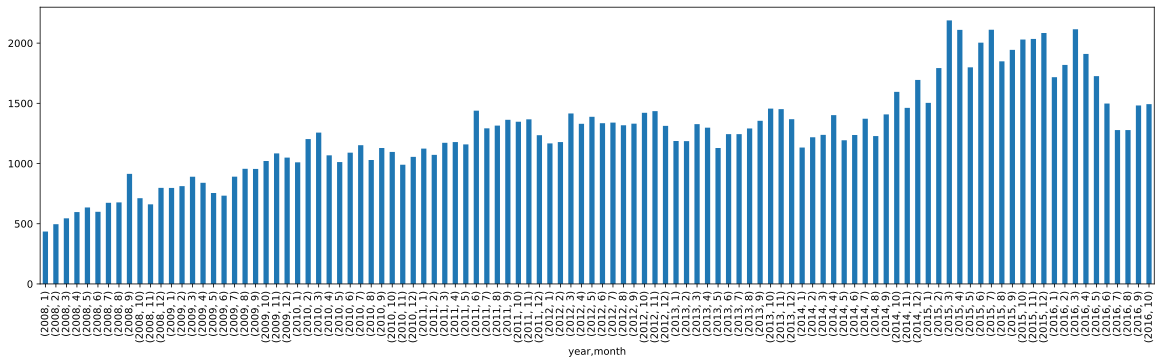

In [6]:
ax = data.groupby(['year','month']).size().plot(kind='bar',figsize=(20,5))

2) Проаналізуйте публікації в місяці з попереднього питання. Оберіть один або кілька варіантів.
*   Один або кілька днів сильно вирізняються із загальної картини
*   На Хабрі завжди більше статей, ніж на Гіктаймс
*   По суботах Гіктайм і Хабр публікують приблизно однакову кількість статей
---
Кожен з варіантів відповідає дійсності

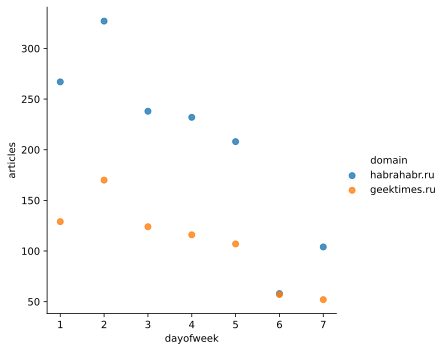

In [7]:
peak_data = data[(data['month'] == 3) & (data['year'] == 2015)]
habr = pd.DataFrame({'domain': ['habrahabr.ru' for i in range(7)],'dayofweek': [i for i in range(1,8)],})
geektimes = pd.DataFrame({'domain': ['geektimes.ru' for i in range(7)],'dayofweek': [i for i in range(1,8)],})
habr['articles'] = [peak_data[(peak_data['domain'] == 'habrahabr.ru') & (peak_data['dayofweek']==i)].shape[0] for i in range(1,8)]
geektimes['articles'] = [peak_data[(peak_data['domain'] == 'geektimes.ru') & (peak_data['dayofweek']==i)].shape[0] for i in range(1,8)]
sns.lmplot(x='dayofweek', y='articles', hue='domain', data=pd.concat([habr, geektimes],ignore_index=True),fit_reg=False)

3) Коли найкраще опублікувати статтю? Оберіть один або кілька варіантів
1. Найбільше переглядів набирають статті, опубліковані о 12 годині дня
2. В опублікованих о 10 ранку постів найбільше коментарів
3. Найбільше переглядів набирають статті, опубліковані о 6 годині ранку
4. Максимальна кількість коментарів на Гіктаймсі набрала стаття, опублікована о 9
годині вечора
5. На Хабрі денні статті коментують частіше, ніж вечірні
---
Твердження 1 та 5 - правильні, інші - ні



In [8]:
columns = ['views','comments','hour']

sns_plot = sns.pairplot(peak_data, hue='domain', vars=columns)

4) Кого з топ-20 авторів найчастіше мінусують?
---
@alizar

<Axes: xlabel='author'>

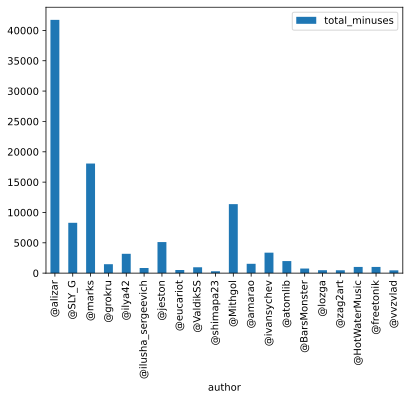

In [9]:
authors = data['author'].drop_duplicates()
authors_with_total_favs = pd.DataFrame({'author': authors})
authors_with_total_favs['total_favs']=[data[data['author'] == i]['favs'].sum() for i in authors]
authors_with_total_favs.sort_values(by='total_favs', axis=0, ascending=False, inplace=True)
top_20 = authors_with_total_favs.iloc[0:20,0]
top_20_with_total_minuses = pd.DataFrame({'author': top_20})
top_20_with_total_minuses['total_minuses']=[data[data['author'] == i]['votes_minus'].sum() for i in top_20]
top_20_with_total_minuses.plot(x='author',y='total_minuses',kind='bar')

5) Порівняйте суботи і понеділки. Чи правда, що по суботах автори пишуть в основному вдень, а по понеділках – в основному ввечері?
---
Не правда

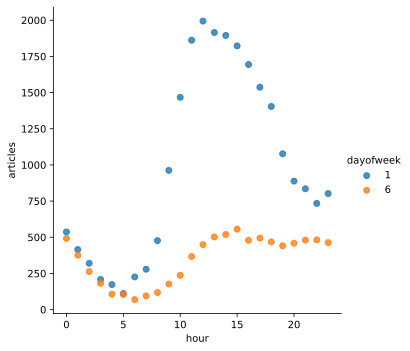

In [10]:
monday = pd.DataFrame({'dayofweek': [1 for i in range(24)], 'hour': [i for i in range(24)]})
monday['articles'] = [data[(data['dayofweek'] == 1) & (data['hour']==i)].shape[0] for i in range(24)]
saturday = pd.DataFrame({'dayofweek': [6 for i in range(24)], 'hour': [i for i in range(24)]})
saturday['articles'] = [data[(data['dayofweek'] == 6) & (data['hour']==i)].shape[0] for i in range(24)]
sns.lmplot(x='hour', y='articles', hue='dayofweek', data=pd.concat([saturday,monday],ignore_index=True),fit_reg=False)